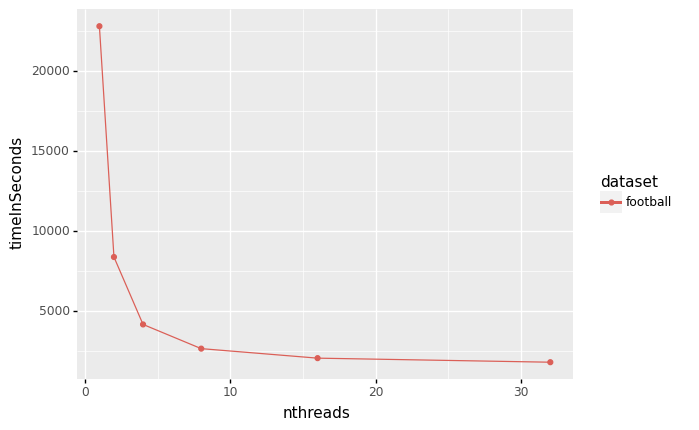

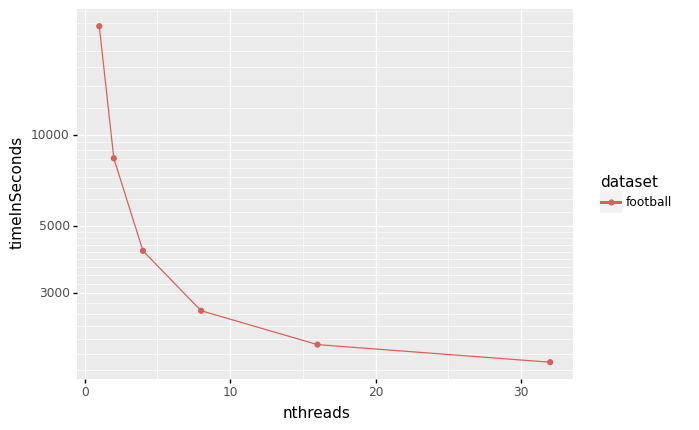

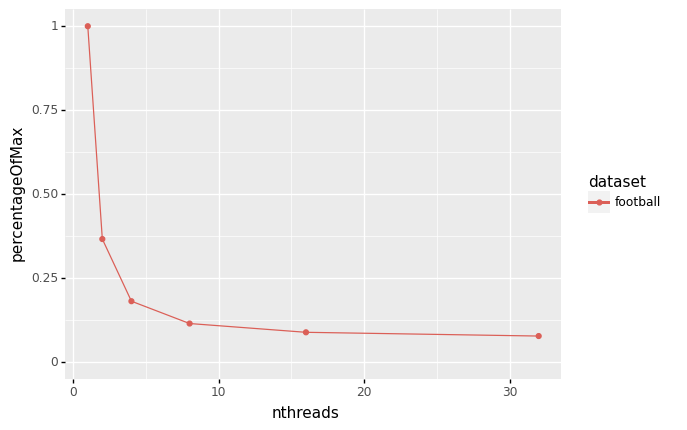

In [3]:
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

dfNew = pd.read_csv("localData/runtimeExperiments/nthreads_new_variant.csv")

#new Variant:
dsToMin = {}
for ds in dfNew.dataset.unique():
    nthreadsOneResult = dfNew[(dfNew['dataset'] == ds) & (dfNew['nthreads'] == 1)].iloc[0]['timeInSeconds']
    dsToMin[ds] = nthreadsOneResult

def getpercentageOfMax(x):
    return x['timeInSeconds'] / dsToMin[x['dataset']]

dfNew['percentageOfMax'] = (dfNew.apply(getpercentageOfMax, axis=1))
# old variant:
dsToMin = {}

plot = ggplot(dfNew, aes(x ='nthreads', color="dataset", y ="timeInSeconds")) + geom_line() + geom_point()
print(plot)
plot = ggplot(dfNew, aes(x ='nthreads', color="dataset", y ="timeInSeconds")) + geom_line() + geom_point() + scale_y_log10()
print(plot)
plot = ggplot(dfNew, aes(x ='nthreads', color="dataset", y ="percentageOfMax")) + geom_line() + geom_point() + ylim(0, 1)
print(plot)
